In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

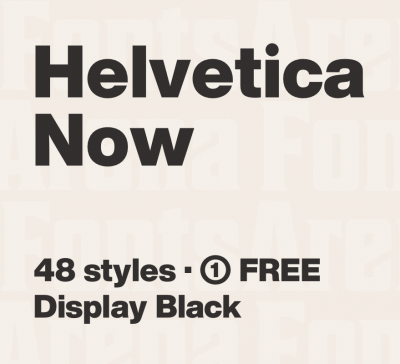

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

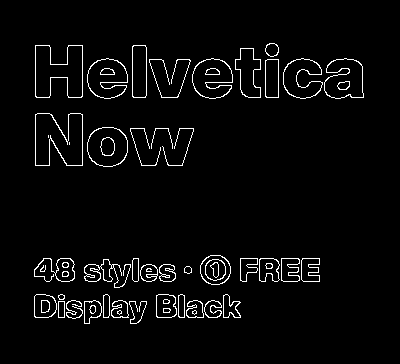

In [5]:
cv2_imshow(edges)

# Assignment - 1A


## Vertical Edge Detector
Vertical edge detectors are essentially discrete generalization of the partial difference equation of: 

$$\frac{\partial I}{\partial x} = \frac{I(x+\delta x, y) - 2I(x, y) + I(x-\delta x, y)}{2\delta x} = \frac{I_{x+1, y} -2I_{x, y}+I_{x-1, y}}{2} $$

The above formulation is known as central difference formula which considers the leading as well as lagging pixel for vertical edges. Hence, provides an elaborate sets of edges. A variation of the same called the forward or backward difference can also be used for computing the first order derivatives. The discrete form of the same can be represented by: $I_{x+1, y} -I_{x, y} $. The Sobel filters are based on this approximation. 

[[ 1. -2.  1.]
 [ 1. -2.  1.]
 [ 1. -2.  1.]]


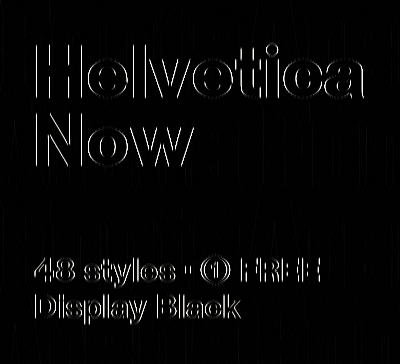

In [6]:
kernel = np.float32([[1,-2,1],[1,-2,1],[1,-2,1]])
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Horizonal Edge Detector

Horizontal edge detectors are essentially discrete generalization of the partial difference equation of: 

$$\frac{\partial I}{\partial y} = \frac{I(x, y+\delta y) - 2I(x, y) + I(x, y-\delta y)}{2\delta y} = \frac{I_{x, y+1} -2I_{x, y}+I_{x, y-1}}{2} $$

The above formulation is known as central difference formula which considers the leading as well as lagging pixel for vertical edges. Hence, provides an elaborate sets of edges. A variation of the same called the forward or backward difference can also be used for computing the first order derivatives. The discrete form of the same can be represented by: $I_{x, y+1} -I_{x, y} $. The Sobel filters are based on this approximation. 

[[ 1.  1.  1.]
 [-2. -2. -2.]
 [ 1.  1.  1.]]


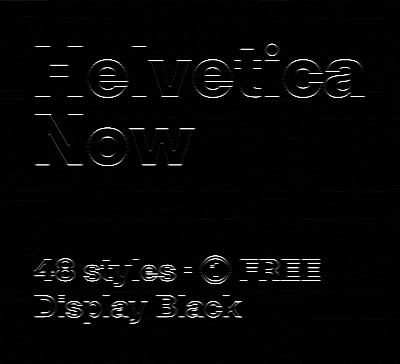

In [13]:
kernel = np.float32([[1,1,1],[-2,-2,-2],[1,1,1]])
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## 45 Degree Angle Detector (either)

Keeping up with the above 2 cases of central difference formulations a combined 45  and 135 degree edge selector can be written as:

$
K_{45} = \begin{vmatrix}
1 & 0 & 0 \\
0 &  -2 & 0 \\
0 &  0 & 1
\end{vmatrix}$
 and  $K_{135} =
\begin{vmatrix}
0 & 0 & 1 \\
0 &  -2 & 0 \\
1 &  0 & 0
\end{vmatrix}
$ respectively.


A combined formulation can be provided which will detect both sets of line by using the filter: $K = \begin{vmatrix}
1 & 0 & 1 \\
0 &  -4 & 0 \\
1 &  0 & 1
\end{vmatrix}$

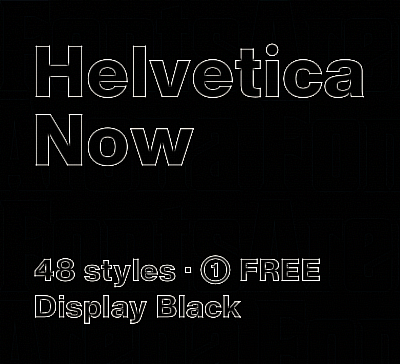

In [8]:
kernel = np.float32([[1,0,1],[0,-4,0],[1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Blur Kernel

A blur kernel is obtained when a pixel is averaged over neighboring pixels. Blurring helps remove high frequncy noise in an image like JPEG arifacts etc. It also helps establish weak solutions for a computation as soft differentiation operations may become discontinuous. Canny's filter (shown above) is a classic such example where Gaussian blurring is used for differentiation. The Gaussian function is a classic continuously diffentiable function which has a closed form solution [@Oliveira2012]. The uniform blurring effect are shown in the sample below. 


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


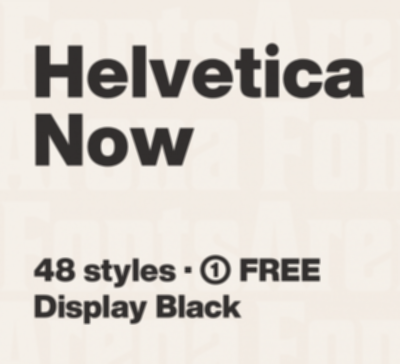

In [9]:
kernel = kernel = np.ones((3,3),np.float32)/9
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Sharpen Kernel

Sharpening operation accentuates the edges and highlights the subtstantial channel variation in intensity. The sharpen operation can be thought off the inverse of the blur operation. Subtracting the blurred image from an original image can also effect a sharpened image. A uniform sharpening operation is shown below:


[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.         -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


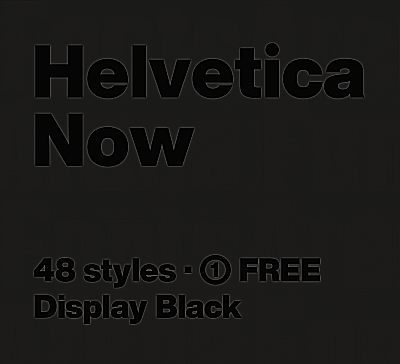

In [10]:
kernel = np.ones((3,3),np.float32)/-9
kernel[1, 1] = 1
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Identity Kernel

This kernal does nothing and given the input image the output remains the same. Normally, such a filter has no significance as such. However, convolution operations have the certain interesting properties:

$$ \frac{d}{dt}(f*g)(t) = \frac{df}{dt}*g$$

This essentially means the differentiation can be applied to the kernel rather than the complete image thus reducing the computation complexity of the operations. In such cases, idenity operator can be used to complete a functional form of a kernel and act on the kernel than apply the operation on the image directly. 

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


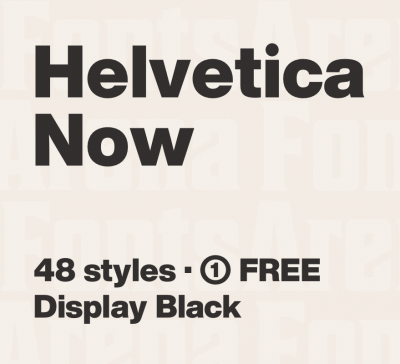

In [11]:
kernel = np.zeros((3,3),np.float32)
kernel[1, 1] = 1
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Bibliography
 
 [@Oliveira2012]: Mauri Aparecido de Oliveira and Ricardo Hirata Ikeda, Representation of the n-th Derivative of the Normal PDF Using Bernoulli Numbers and Gamma Function, Applied Mathematical Sciences, Vol. 6, 2012, no. 74, 3661 - 3673